In [12]:
# Importing all necessary libraries
import cv2
import os

import torch
from torchvision.transforms.functional import hflip, rotate
from torchvision.transforms import CenterCrop, Resize
import matplotlib.pyplot as plt

VIDEO_PATH = 'video/conv/mercedes-conv3.mp4'
FOLDER_NAME = 'images/' + VIDEO_PATH.split('/')[-1][:-4]

# Read the video from specified path
cam = cv2.VideoCapture(VIDEO_PATH)

try:
	
	# creating a folder named data
	if not os.path.exists(FOLDER_NAME):
		os.makedirs(FOLDER_NAME)

# if not created then raise error
except OSError:
	print ('Error: Creating directory of images')

In [13]:
# num of frame
currentframe = 0

while(True):
    # reading from frame
    ret,frame = cam.read()

    if ret:

        image = torch.from_numpy(frame)
        image = image.permute(2,1,0)
        image = Resize(300)(image)
        image = hflip(image)
        image = rotate(image, 90)
        # if video is still left continue creating images
        name = FOLDER_NAME + '/img' + str(currentframe).zfill(4) + '.jpg'

        # writing the extracted images
        cv2.imwrite(name, image.permute(1,2,0).numpy())
        # cv2.imwrite(name, frame)

        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


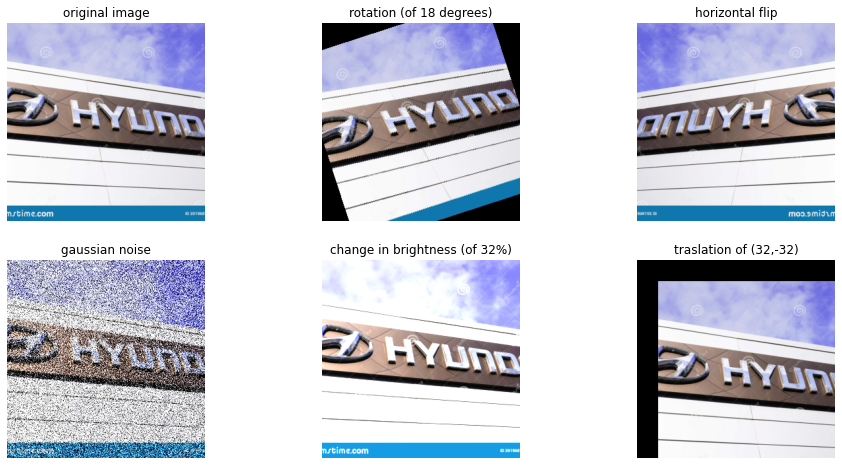

In [92]:
images, labels = next(iter(test_dl)) #picking a batch
image = images[0]


fig, axs = plt.subplots(figsize=(16,8), nrows=2, ncols=3)


if using_res: #normalized image
    image = image * torch.tensor([0.229, 0.224, 0.225]).reshape(3,1,1) + torch.tensor([0.485, 0.456, 0.406]).reshape(3,1,1)

img=image

axs[0][0].imshow(img.permute(1,2,0))
axs[0][0].set_title('original image')
axs[0][0].axis('off')

#apply rotation
angle = torch.randint(40, size=(1,)).item() - 20
img = rotate(img, angle)
axs[0][1].imshow(img.permute(1,2,0))
axs[0][1].set_title('rotation (of {} degrees)'.format(angle))
axs[0][1].axis('off')

#apply hflip
img = image
img = hflip(img)
axs[0][2].imshow(img.permute(1,2,0))
axs[0][2].set_title('horizontal flip')
axs[0][2].axis('off')

#apply gauss noise
img = image
gauss_noise = np.random.normal(0, 0.4, (img.shape[1], img.shape[2]))
img = img + gauss_noise
axs[1][0].imshow(img.permute(1,2,0))
axs[1][0].set_title('gaussian noise')
axs[1][0].axis('off')

#apply random brightness 
img = image
# 1 is standard brightness, i generate a num between 0,5 and 1,5 to obscure/enlight the img
num = 0.5 + random.random()
img = adjust_brightness(img, num)
axs[1][1].imshow(img.permute(1,2,0))
axs[1][1].set_title(f"change in brightness (of {int(num*100) - 100}%)")
axs[1][1].axis('off')

#apply random translation (between -100, 100px on both axes)
img = image
trX = torch.randint(200, size=(1,)).item() - 100
trY = torch.randint(200, size=(1,)).item() - 100
img = affine(img, angle=0, translate=(trX, trY), scale=1, shear=0)
axs[1][2].imshow(img.permute(1,2,0))
axs[1][2].set_title(f"traslation of ({trX},{-trY})")
axs[1][2].axis('off')

plt.show()